1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
Prediction: Tuberculosis (Probability: 0.5362)


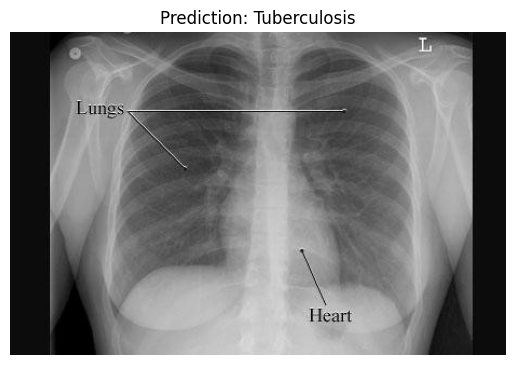

In [ ]:

import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

model = models.Sequential([
    Input(shape=(150, 150, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


model.load_weights('/content/tb_detection_model.h5')

def preprocess_image(img_path, target_size=(150, 150)):

    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

img_path = '/content/ai_test.jpeg'

img_array = preprocess_image(img_path)


prediction = model.predict(img_array)


if prediction[0] > 0.5:
    print(f"Prediction: Tuberculosis (Probability: {prediction[0][0]:.4f})")
else:
    print(f"Prediction: Normal (Probability: {1 - prediction[0][0]:.4f})")

plt.imshow(image.load_img(img_path))
plt.title(f"Prediction: {'Tuberculosis' if prediction[0] > 0.5 else 'Normal'}")
plt.axis('off')
plt.show()